# Analysis Business in R

This code is main edited by Hua Tong

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to do test for business attribute on whether add some service can add star rating. 


,city,stars,review_count,Alcohol,Ambience,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,⋯,BusinessParking_valet,BusinessParking_validated,BusinessParking,GoodForMeal,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_lunch,GoodForMeal_latenight
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Pittsburgh,4.0,31,None,,True,True,,True,True,⋯,False,False,,,,,,,,
2,Cleveland,2.5,11,,,,True,,True,,⋯,,,,,,,,,,
3,Cleveland,4.5,21,None,,True,True,True,True,True,⋯,False,False,,,,,,,,
4,Pittsburgh,2.0,14,beer_and_wine,classy,,True,False,True,True,⋯,False,False,lot,,,,,,,
5,Madison,4.5,60,beer_and_wine,casual,True,True,True,True,True,⋯,False,False,lot,lunch dinner,False,False,False,True,True,False
6,Cleveland,3.5,5,,,,,,True,,⋯,False,False,lot,,,,,,,


,city,stars,review_count,Alcohol,Ambience,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,⋯,BusinessParking_valet,BusinessParking_validated,BusinessParking,GoodForMeal,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_lunch,GoodForMeal_latenight
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1555,Cleveland,5.0,3,,,,True,,,,⋯,,,,,,,,,,
1556,Urbana-Champaign,3.5,55,None,,,True,,True,True,⋯,False,False,,,,,,,,
1557,Cleveland,3.0,10,None,,False,True,True,True,True,⋯,False,False,,lunch dinner,False,False,False,True,True,False
1558,Cleveland,3.0,12,None,,False,True,,True,True,⋯,False,False,,,,,,,,
1559,Pittsburgh,4.0,39,None,,True,True,True,True,False,⋯,False,False,street,lunch dinner,False,False,False,True,True,False
1560,Madison,2.5,19,full_bar,,True,True,False,True,True,⋯,False,False,,,,,,,,


     city               stars        review_count      Alcohol         
 Length:1560        Min.   :1.000   Min.   :  3.00   Length:1560       
 Class :character   1st Qu.:3.000   1st Qu.:  8.00   Class :character  
 Mode  :character   Median :3.500   Median : 18.00   Mode  :character  
                    Mean   :3.361   Mean   : 41.44                     
                    3rd Qu.:4.000   3rd Qu.: 46.00                     
                    Max.   :5.000   Max.   :834.00                     
   Ambience         BikeParking        BusinessAcceptsCreditCards
 Length:1560        Length:1560        Length:1560               
 Class :character   Class :character   Class :character          
 Mode  :character   Mode  :character   Mode  :character          
                                                                 
                                                                 
                                                                 
    Caters          GoodForKids   

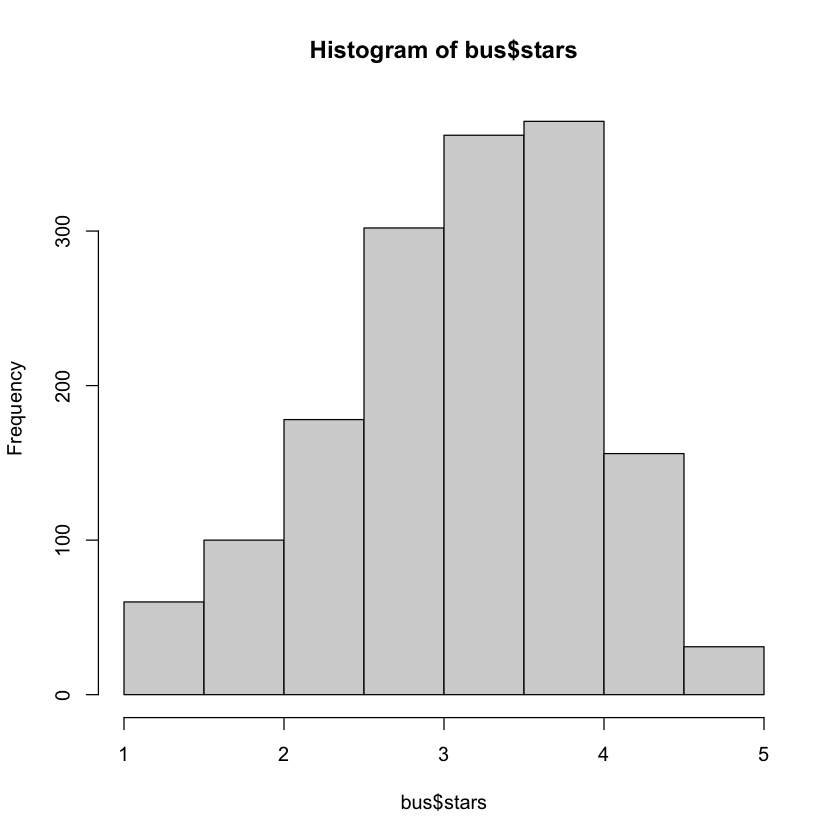

In [7]:
bus=read.csv("data/pizza_business.csv")
#Remove unnecessary variables
bus=bus[,-c(1,2,3,4,6,7,10,26:32)]
#Explore the data
head(bus)
tail(bus)
summary(bus)
hist(bus$stars)

attach(bus)

Searching for factors that affect the stars:

# City

In [8]:

sum(city=='')
aggregate(stars,list(Cities=city),mean)
anova(lm(stars~city))

[1] 0

Cities,x
<chr>,<dbl>
Cleveland,3.340108
Madison,3.234483
Pittsburgh,3.430533
Urbana-Champaign,3.189655


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
city,3,7.338386,2.4461287,3.700393,0.01137788
Residuals,1556,1028.587095,0.6610457,NA,NA


The mean ratings of pizza restaurants in different cities are not equal. The area with lowest and highest ratings are Urbana-Champaign (3.19 stars) and Pittsburgh (3.43 stars).

# Alcohol

In [11]:
sum(Alcohol=='')
value=which(Alcohol!='')
aggregate(stars[value],list(Alcohol=Alcohol[value]),mean)
anova(lm(stars[value]~Alcohol[value]))
t.test(stars[Alcohol=='beer_and_wine'],stars[Alcohol=='full_bar'])
t.test(stars[Alcohol=='beer_and_wine'],stars[Alcohol=='None'])
t.test(stars[Alcohol=='None'],stars[Alcohol=='full_bar'])
t.test(stars[Alcohol=='None'],stars[Alcohol=='full_bar'|Alcohol=='beer_and_wine'])

[1] 448

Alcohol,x
<chr>,<dbl>
beer_and_wine,3.573333
full_bar,3.555385
None,3.387755


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Alcohol[value],2,8.204774,4.1023872,7.831613,0.0004193427
Residuals,1109,580.920900,0.5238241,NA,NA



	Welch Two Sample t-test

data:  stars[Alcohol == "beer_and_wine"] and stars[Alcohol == "full_bar"]
t = 0.28689, df = 254.6, p-value = 0.7744
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1052578  0.1411553
sample estimates:
mean of x mean of y 
 3.573333  3.555385 



	Welch Two Sample t-test

data:  stars[Alcohol == "beer_and_wine"] and stars[Alcohol == "None"]
t = 2.96, df = 263.12, p-value = 0.003357
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0621294 0.3090271
sample estimates:
mean of x mean of y 
 3.573333  3.387755 



	Welch Two Sample t-test

data:  stars[Alcohol == "None"] and stars[Alcohol == "full_bar"]
t = -3.7381, df = 863.18, p-value = 0.0001977
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.25564555 -0.07961347
sample estimates:
mean of x mean of y 
 3.387755  3.555385 



	Welch Two Sample t-test

data:  stars[Alcohol == "None"] and stars[Alcohol == "full_bar" | Alcohol == "beer_and_wine"]
t = -4.1193, df = 1110, p-value = 4.083e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.25584300 -0.09075206
sample estimates:
mean of x mean of y 
 3.387755  3.561053 


The ANOVA table shows that the provision of alcohol could affect the ratings. There is no significant difference between offering 'beer and wine' and 'full bar'. But the restaurants that do not provide alcohol receive lower ratings (averaging -0.17 stars) than others.

# Bikeparking

In [27]:
sum(BikeParking=='')
value=which(BikeParking!='')
aggregate(stars[value],list(BikeParking=BikeParking[value]),mean)
t.test(stars[BikeParking=='True'],stars[BikeParking=='False'])

[1] 560

BikeParking,x
<chr>,<dbl>
False,3.366987
True,3.556686



	Welch Two Sample t-test

data:  stars[BikeParking == "True"] and stars[BikeParking == "False"]
t = 3.8378, df = 536.42, p-value = 0.0001389
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09260122 0.28679652
sample estimates:
mean of x mean of y 
 3.556686  3.366987 


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

The restaurants with bike-parking areas are expected to receive ratings 0.19 stars higher than others.


# Credit cards

In [13]:
sum(BusinessAcceptsCreditCards=='')
value=which(BusinessAcceptsCreditCards!='')
aggregate(stars[value],list(CreditCard=BusinessAcceptsCreditCards[value]),mean)
t.test(stars[BusinessAcceptsCreditCards=='True'],stars[BusinessAcceptsCreditCards=='False'])

[1] 166

CreditCard,x
<chr>,<dbl>
False,3.776786
True,3.353513



	Welch Two Sample t-test

data:  stars[BusinessAcceptsCreditCards == "True"] and stars[BusinessAcceptsCreditCards == "False"]
t = -4.3684, df = 60.981, p-value = 4.941e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6170245 -0.2295215
sample estimates:
mean of x mean of y 
 3.353513  3.776786 


The result shows that the mean rating of restaurants that accept credit cards is lower than others. But considering that the percentage of restaurants that do not accept credit cards is quite low (about 4%), there may be some special situations that influence the result.

# Good for Kids

In [14]:
sum(GoodForKids=='')
value=which(GoodForKids!='')
aggregate(stars[value],list(Kids=GoodForKids[value]),mean)
t.test(stars[GoodForKids=='True'],stars[GoodForKids=='False'])

[1] 305

Kids,x
<chr>,<dbl>
False,3.186335
True,3.420018



	Welch Two Sample t-test

data:  stars[GoodForKids == "True"] and stars[GoodForKids == "False"]
t = 3.2033, df = 195.52, p-value = 0.001586
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.08981198 0.37755377
sample estimates:
mean of x mean of y 
 3.420018  3.186335 


Providing facilities for kids are expected to increase the average rating by 0.23 stars. It seems that people like eating pizza with their kids, so we suggest that restaurants could prepare something like child seats, toys, or pizza for children, if possible.

# TV

In [15]:
sum(HasTV=='')
value=which(HasTV!='')
aggregate(stars[value],list(TV=HasTV[value]),mean)
t.test(stars[HasTV=='True'],stars[HasTV=='False'])

[1] 359

TV,x
<chr>,<dbl>
False,3.548701
True,3.432665



	Welch Two Sample t-test

data:  stars[HasTV == "True"] and stars[HasTV == "False"]
t = -1.6587, df = 189.94, p-value = 0.09882
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.25402412  0.02195103
sample estimates:
mean of x mean of y 
 3.432665  3.548701 


Given the p-value of 0.099, having TVs do not significantly affect the restaurant ratings ($\alpha$=0.05).

# Noise

In [17]:
sum(NoiseLevel=='')
value=which(NoiseLevel!='')
aggregate(stars[value],list(Noise=NoiseLevel[value]),mean)
anova(lm(stars[value]~NoiseLevel[value]))
t.test(stars[NoiseLevel=='quiet'],stars[NoiseLevel=='average'])
t.test(stars[NoiseLevel=='average'],stars[NoiseLevel=='loud'])
t.test(stars[NoiseLevel=='loud'],stars[NoiseLevel=='very_loud'])
t.test(stars[NoiseLevel=='average'|NoiseLevel=='quiet'],stars[NoiseLevel=='loud'|NoiseLevel=='very_loud'])

[1] 590

Noise,x
<chr>,<dbl>
average,3.517665
loud,3.296053
quiet,3.430952
very_loud,3.045455


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NoiseLevel[value],3,10.02675,3.3422489,6.83932,0.0001461442
Residuals,966,472.06629,0.4886815,NA,NA



	Welch Two Sample t-test

data:  stars[NoiseLevel == "quiet"] and stars[NoiseLevel == "average"]
t = -1.5023, df = 328.77, p-value = 0.134
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.20025632  0.02683082
sample estimates:
mean of x mean of y 
 3.430952  3.517665 



	Welch Two Sample t-test

data:  stars[NoiseLevel == "average"] and stars[NoiseLevel == "loud"]
t = 2.6095, df = 92.021, p-value = 0.01058
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05294361 0.39028139
sample estimates:
mean of x mean of y 
 3.517665  3.296053 



	Welch Two Sample t-test

data:  stars[NoiseLevel == "loud"] and stars[NoiseLevel == "very_loud"]
t = 1.5375, df = 53.717, p-value = 0.13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07621428  0.57741045
sample estimates:
mean of x mean of y 
 3.296053  3.045455 



	Welch Two Sample t-test

data:  stars[NoiseLevel == "average" | NoiseLevel == "quiet"] and stars[NoiseLevel == "loud" | NoiseLevel == "very_loud"]
t = 3.6818, df = 132.98, p-value = 0.0003357
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1278777 0.4247867
sample estimates:
mean of x mean of y 
 3.496516  3.220183 


From the results of ANOVA and T-tests, we find that the rating of restaurant would decrease if the noise is above 'loud' level. The average rating of 'loud' and 'very loud' restaurants is 0.28 stars lower than 'quiet' and 'average' ones. Therefore, turn down the audio system if it is too loud.

# Delivery

In [18]:
sum(RestaurantsDelivery=='')
value=which(RestaurantsDelivery!='')
aggregate(stars[value],list(Delivery=RestaurantsDelivery[value]),mean)
t.test(stars[RestaurantsDelivery=='True'],stars[RestaurantsDelivery=='False'])

[1] 170

Delivery,x
<chr>,<dbl>
False,3.763533
True,3.231954



	Welch Two Sample t-test

data:  stars[RestaurantsDelivery == "True"] and stars[RestaurantsDelivery == "False"]
t = -12.638, df = 765.85, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6141486 -0.4490093
sample estimates:
mean of x mean of y 
 3.231954  3.763533 


The result shows that restaurants that providing food delivery get significantly lower ratings. Probably it is because pizza is not good for delivery (it may take too long time), or people cannot express their needs clearly to the restaurant when placing the order. However, this result is quite hard to explain since it may include some other problems. If there are a large number of orders for food delivery, just keep it.

# Good for Groups

In [19]:
sum(RestaurantsGoodForGroups=='')
value=which(RestaurantsGoodForGroups!='')
aggregate(stars[value],list(Groups=RestaurantsGoodForGroups[value]),mean)
t.test(stars[RestaurantsGoodForGroups=='True'],stars[RestaurantsGoodForGroups=='False'])

[1] 292

Groups,x
<chr>,<dbl>
False,3.222039
True,3.437241



	Welch Two Sample t-test

data:  stars[RestaurantsGoodForGroups == "True"] and stars[RestaurantsGoodForGroups == "False"]
t = 3.9028, df = 447.04, p-value = 0.0001097
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1068360 0.3235664
sample estimates:
mean of x mean of y 
 3.437241  3.222039 


The average rating of a restaurant would increase by 0.22 stars if it is good for groups. So try to make a small area for groups, like putting some large tables, if possible.

# Reservation

In [21]:
sum(RestaurantsReservations=='')
value=which(RestaurantsReservations!='')
aggregate(stars[value],list(Reservation=RestaurantsReservations[value]),mean)
t.test(stars[RestaurantsReservations=='True'],stars[RestaurantsReservations=='False'])

[1] 234

Reservation,x
<chr>,<dbl>
False,3.329315
True,3.539792



	Welch Two Sample t-test

data:  stars[RestaurantsReservations == "True"] and stars[RestaurantsReservations == "False"]
t = 4.5435, df = 553.51, p-value = 6.796e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1194837 0.3014705
sample estimates:
mean of x mean of y 
 3.539792  3.329315 


The restaurants that accept reservations receive higher ratings (0.21 stars) than others. So we suggest restaurants making reservations accessible.

# Takeout

In [22]:
sum(RestaurantsTakeOut=='')
value=which(RestaurantsTakeOut!='')
aggregate(stars[value],list(Takeout=RestaurantsTakeOut[value]),mean)
t.test(stars[RestaurantsTakeOut=='True'],stars[RestaurantsTakeOut=='False'])

[1] 157

Takeout,x
<chr>,<dbl>
False,3.555556
True,3.364260



	Welch Two Sample t-test

data:  stars[RestaurantsTakeOut == "True"] and stars[RestaurantsTakeOut == "False"]
t = -0.73756, df = 17.234, p-value = 0.4707
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7379403  0.3553490
sample estimates:
mean of x mean of y 
 3.364260  3.555556 


The percentage of restaurants without takeout is too low (about 1.2%), so the result seems meaningless.

# Wifi

In [24]:
sum(WiFi=='')
value=which(WiFi!='')
aggregate(stars[value],list(Wifi=WiFi[value]),mean)
anova(lm(stars[value]~WiFi[value]))
t.test(stars[WiFi=='no'],stars[WiFi=='free'])

[1] 556

Wifi,x
<chr>,<dbl>
free,3.593240
no,3.423145
paid,3.388889


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WiFi[value],2,7.163743,3.5818717,6.947664,0.001007903
Residuals,1001,516.066087,0.5155505,NA,NA



	Welch Two Sample t-test

data:  stars[WiFi == "no"] and stars[WiFi == "free"]
t = -3.7883, df = 971.57, p-value = 0.000161
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.25820722 -0.08198322
sample estimates:
mean of x mean of y 
 3.423145  3.593240 


There are few restaurants with paid WiFi, so we ignore them. The average rating of restaurants with free WiFi is 0.17 stars higher than ones without WiFi. We suggest that restaurants could offer free WiFi if it does not cost too much.

# Ambience

In [25]:
sum(Ambience_casual=='')
value=which(Ambience_casual!='')
aggregate(stars[value],list(Casual=Ambience_casual[value]),mean)
t.test(stars[Ambience_casual=='True'],stars[Ambience_casual=='False'])
t.test(stars[Ambience_classy=='True'],stars[Ambience_classy=='False'])

[1] 371

Casual,x
<chr>,<dbl>
False,3.370948
True,3.652455



	Welch Two Sample t-test

data:  stars[Ambience_casual == "True"] and stars[Ambience_casual == "False"]
t = 6.9302, df = 1000.5, p-value = 7.519e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2017965 0.3612178
sample estimates:
mean of x mean of y 
 3.652455  3.370948 



	Welch Two Sample t-test

data:  stars[Ambience_classy == "True"] and stars[Ambience_classy == "False"]
t = 2.002, df = 126.39, p-value = 0.04742
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001543203 0.265793804
sample estimates:
mean of x mean of y 
 3.585000  3.451331 


We can see that restaurants with casual or classy ambience get higher ratings. But ambience reflects different styles and themes of restaurants, which is not necessary to change.

# Parking

In [26]:
for(i in 1:nrow(bus)){
  if(sum(bus[i,27:31]=='False')==5){
    bus$Parking[i]='False'
  }else if(sum(bus[i,27:31]=='True')>0){
    bus$Parking[i]='True'
  }else{
    bus$Parking[i]=''
  }
}
attach(bus)

Parking=factor(Parking)
sum(Parking=='')
value=which(Parking!='')
aggregate(stars[value],list(Parking=Parking[value]),mean)
t.test(stars[Parking=='True'],stars[Parking=='False'])

The following objects are masked from bus (pos = 3):

    Alcohol, Ambience, Ambience_casual, Ambience_classy,
    Ambience_divey, Ambience_hipster, Ambience_intimate,
    Ambience_romantic, Ambience_trendy, Ambience_upscale, BikeParking,
    BusinessAcceptsCreditCards, BusinessParking,
    BusinessParking_garage, BusinessParking_lot,
    BusinessParking_street, BusinessParking_valet,
    BusinessParking_validated, Caters, city, GoodForKids, GoodForMeal,
    GoodForMeal_breakfast, GoodForMeal_brunch, GoodForMeal_dessert,
    GoodForMeal_dinner, GoodForMeal_latenight, GoodForMeal_lunch,
    HasTV, NoiseLevel, OutdoorSeating, RestaurantsAttire,
    RestaurantsDelivery, RestaurantsGoodForGroups,
    RestaurantsReservations, RestaurantsTakeOut, review_count, stars,
    WiFi




[1] 325

Parking,x
<fct>,<dbl>
False,3.238956
True,3.593623



	Welch Two Sample t-test

data:  stars[Parking == "True"] and stars[Parking == "False"]
t = 7.9135, df = 864.64, p-value = 7.645e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2667022 0.4426318
sample estimates:
mean of x mean of y 
 3.593623  3.238956 


We can see that having a parking space could increase the average rating by 0.36 stars. So we suggest that restaurants should try to offer a parking space, if possible.
